# Table of Contents <a id="top"></a>


#### 0. [Project Introduction](#project-intro)<br>


#### 1. [Data Exploration](#data-exploration)<br>
1.1. [Introduction to Dataset](#data_intro)<br>
1.2. [Data Distribution and Visualization of Raw Data](#data-visualization-raw)<br>
    
    
#### 2. [Data Preprocessing](#data-preprocessing)<br>
   2.1.  [Row and Column Deletion](#row-column-deletion)<br>
   2.2.  [Decoding of ID Features](#decoding)<br>
   2.3.  [Imputation of Missing Values](#imputation)<br>
   2.4.  [Ordinal Encoding of Age Feature](#ordinal-encoding)<br>
   2.5.  [Complexity Reduction by Grouping Values](#grouping)<br>
   2.6.  [Transformation of Target Variable](#target)<br>
   2.7.  [One-hot Encoding](#one-hot-encoding)<br>
   2.8.  [Split into Training and Test Sets](#train-test-split)<br>
   2.9.  [Data Balancing](#balancing)<br>
   2.10. [Save Preprocessed Dataframes](#"save")<br>

 
#### 3. [Model Building](#model-building)<br>
3.1. [Logistic Regression](#logistic-regression)<br>

*3.1.1. [Initial Model Building and Evaluation](#logistic-regression-initial)<br>*
*3.1.3. [Hyperparameter Tuning](#logistic-regression-tuning)<br>*
*3.1.4. [Weighted Logistic Regression and ROC Curve](#weighted-logistic-regression)<br>*
*3.1.5. [Precision-Recall Curve](#logistic-regression-pr)<br>*
*3.1.6. [Training on Resampled Data](#logistic-regression-sampling)<br>*
*3.1.7. [Feature Importance](#logistic-regression-importance)<br>*
*3.1.8. [Conclusion](#logistic-regression-conclusion)<br>*

3.2 [Naive Bayes](#naive-bayes)<br>

3.3 [Random Forest](#random-forest)<br>

3.4 [CatBoost](#catboost)<br>

*3.4.1. [Initial Model Building and Evaluation](#catboost-initial)<br>*
*3.4.2. [Training on Resampled Data](#catboost-sampling)<br>*
*3.4.3. [Hyperparameter Tuning](#catboost-tuning)<br>*
*3.4.4. [ROC Curve](#catboost-roc)<br>*
*3.4.5. [Precision-Recall Curve](#catboost-pr)<br>*
*3.4.6. [Feature Importance](#catboost-importance)<br>*
*3.4.7. [Conclusion](#catboost-conclusion)<br>*

3.5 [Gradient Boosting](#gradient-boosting)<br>


#### 4. [Final Model Evaluation and Conclusion](#model-evaluation)<br>



# 0. Project Introduction<a id="project-intro"></a>

TO DO: Motivation, Research questions

- Build a model which can be deployed in hospitals to identify patients who are at risk for readmission within a short amount of time

- By inspecting the models we build, we can identify features which are particularly influential to a quick readmission. Understanding this can contribute to mitigate readmissions for future patients.

In [364]:
# Import statements

# Data Processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Resampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Machine Learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, f1_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV
from sklearn.inspection import permutation_importance

from catboost import CatBoostClassifier

ModuleNotFoundError: No module named 'catboost'

# 1. Data Exploration<a id="data-exploration"></a>
[Back to top](#top)

In this first section, we aim at understanding our data as good as possible.

## 1.1. Introduction to dataset <a id="data-intro"></a>
[Back to top](#top)

- Import data, originally from https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008

In [203]:
raw_data_mappings = "https://raw.githubusercontent.com/F4LLC0N3R/ML-Group-2---Diabetes/main/data/IDs_mapping.csv"
raw_data_diabetes = "https://raw.githubusercontent.com/F4LLC0N3R/ML-Group-2---Diabetes/main/data/diabetic_data.csv"

df_mappings = pd.read_csv(raw_data_mappings)
df_diabetes = pd.read_csv(raw_data_diabetes)

- Size of dataset

In [204]:
df_diabetes.shape

(101766, 50)

- First look on data

In [205]:
df_diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


- Get basic characteristics of the columns

In [206]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

- Check for missing values

In [207]:
# Number of NaN values in the raw dataset
df_diabetes.isnull().sum().sum()

0

$\rightarrow$ There are non NaN values in the dataset. However, there are columns with a lot of missing values which are described by the value '?':

In [350]:
# count missing values represented by '?'
question_marks = df_diabetes.isin(['?']).sum(axis=0)

# show columns which have '?' values and show count in descending order
question_marks[question_marks > 0].sort_values(ascending=False)

weight               98569
medical_specialty    49949
payer_code           40256
race                  2273
diag_3                1423
diag_2                 358
diag_1                  21
dtype: int64

In [353]:
# show percentage of missing values
percentage_missing = question_marks / len(df_diabetes)*100
percentage_missing[percentage_missing > 0].sort_values(ascending=False)

weight               96.858479
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
dtype: float64

$\rightarrow$ 43 columns are complete. Three features have a substantial amount of missing values: weight (96.86% missing), payer code (39.56%), and medical specialty (49.08%). Four features have a small amount of missing values: race (2.23%), primary diagnosis (0.02%), secondary diagnosis (0.35%), and additional secondary diagnosis (1.40%)

- Check for duplicate rows

In [210]:
df_diabetes.duplicated().sum()

0

$\rightarrow$ No duplicate rows in the dataset!

- Check number of unique values in every column

In [211]:
df_diabetes.nunique().sort_values(ascending=False)

encounter_id                101766
patient_nbr                  71518
diag_3                         790
diag_2                         749
diag_1                         717
num_lab_procedures             118
num_medications                 75
medical_specialty               73
number_outpatient               39
number_emergency                33
discharge_disposition_id        26
number_inpatient                21
payer_code                      18
admission_source_id             17
number_diagnoses                16
time_in_hospital                14
age                             10
weight                          10
admission_type_id                8
num_procedures                   7
race                             6
glipizide                        4
glyburide-metformin              4
insulin                          4
miglitol                         4
acarbose                         4
rosiglitazone                    4
pioglitazone                     4
glyburide           

Observatons: The encounter ID is different for every single instance in the dataset. The column can be dropped later since it is just a unique label for every row. Two medication columns (``examide``, ``citoglipton``) only have one unique value ('no') and can be dropped.

- Get overview over unique values in columns

In [212]:
for col in df_diabetes:
    print(f'{col}: {df_diabetes[col].unique()}')

encounter_id: [  2278392    149190     64410 ... 443854148 443857166 443867222]
patient_nbr: [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
race: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender: ['Female' 'Male' 'Unknown/Invalid']
age: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id: [6 1 2 3 4 5 8 7]
discharge_disposition_id: [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id: [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital: [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code: ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty: ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General'

acarbose: ['No' 'Steady' 'Up' 'Down']
miglitol: ['No' 'Steady' 'Down' 'Up']
troglitazone: ['No' 'Steady']
tolazamide: ['No' 'Steady' 'Up']
examide: ['No']
citoglipton: ['No']
insulin: ['No' 'Up' 'Steady' 'Down']
glyburide-metformin: ['No' 'Steady' 'Down' 'Up']
glipizide-metformin: ['No' 'Steady']
glimepiride-pioglitazone: ['No' 'Steady']
metformin-rosiglitazone: ['No' 'Steady']
metformin-pioglitazone: ['No' 'Steady']
change: ['No' 'Ch']
diabetesMed: ['No' 'Yes']
readmitted: ['NO' '>30' '<30']


- Analyse Duplicates of Patient Number

In [213]:
# Number of rows which contain a patient number which were documented before
df_diabetes.duplicated(subset='patient_nbr').sum()

30248

In [214]:
# share of encounters from patients who are already documented in the dataset
df_diabetes.duplicated(subset='patient_nbr').sum() / df_diabetes.shape[0]

0.29723090226598275

The number of patient numbers is smaller than the number of encounters (difference of 30,248) which means that the dataset contains readmissions of some patients. In fact, 29.7% of all encounters are from patients whose encounters were documented before.

If the dataset contains multiple inpatient visits for some patientts, the instances cannot be considered as statistically independent. Therefore, we decided to follow the recommendation of the article's authors to only keep the first documented encounters (https://downloads.hindawi.com/journals/bmri/2014/781670.pdf) and to remove the others during preprocessing.

## 1.2. Distribution and Visualization of Raw Data <a id="data-visualization-raw"></a>
[Back to top](#top)

In this section, we have a detailed look into the datatype of every column and the data distribution of the respective features.

- Basic statistics (of numerical columns)

In [215]:
df_diabetes.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


### Categorical data

- Target question: Is the patient readmitted after being released from the hospital? If yes, within 30 days or after?

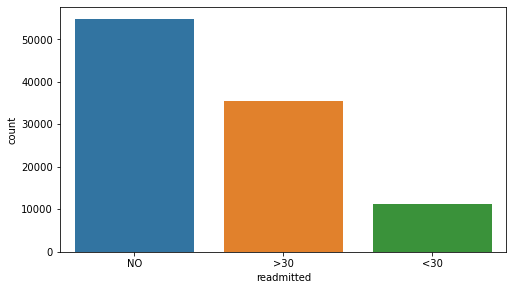

In [217]:
plt.figure(figsize=(8,4.5))
sns.countplot(data=df_diabetes, x='readmitted')
plt.savefig('plots/raw_data/readmitted.png', dpi=300, bbox_inches='tight')

- Demographic features

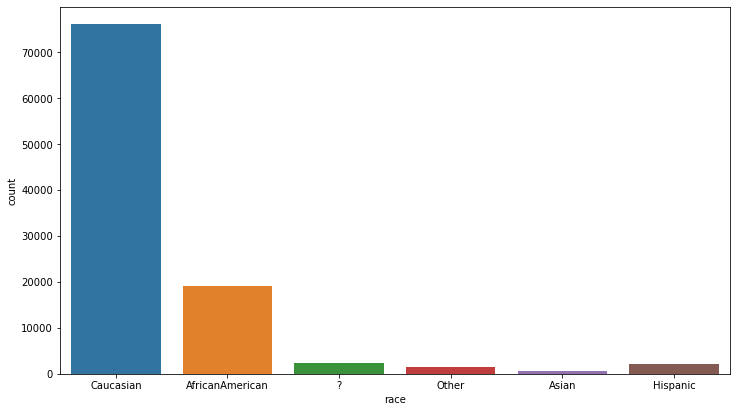

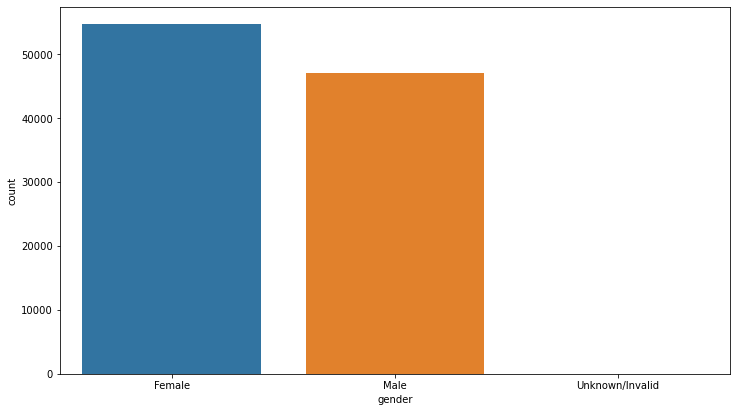

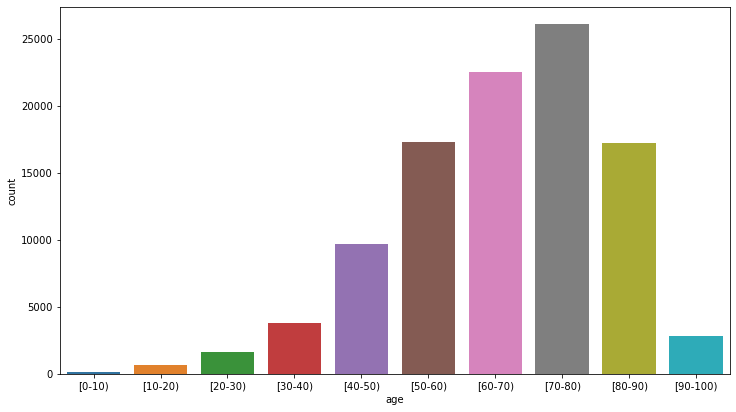

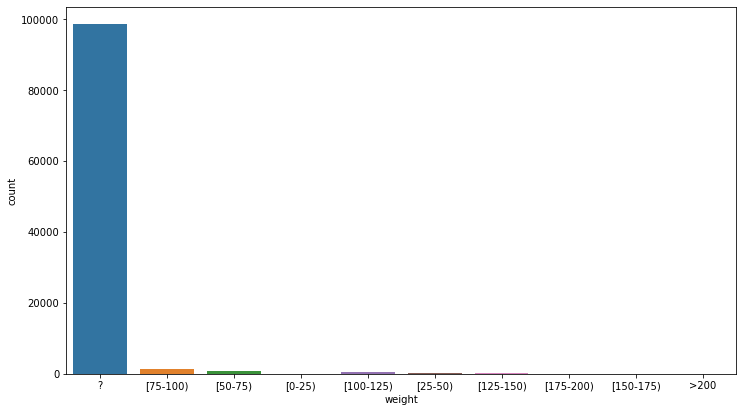

In [218]:
for col in ['race', 'gender', 'age', 'weight']:
    plt.figure(figsize=(12, 6.75))
    sns.countplot(data=df_diabetes, x=col)
    plt.savefig(f'plots/raw_data/{col}.png', dpi=300, bbox_inches='tight')
    plt.show()

- Test results and medication decisions

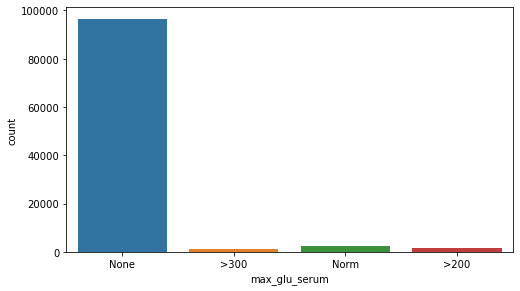

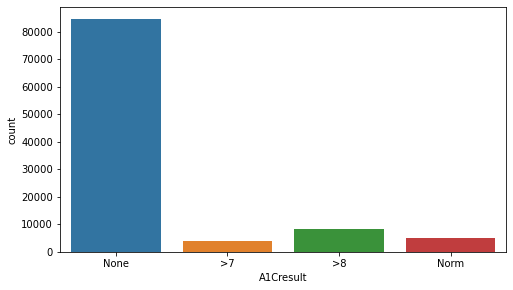

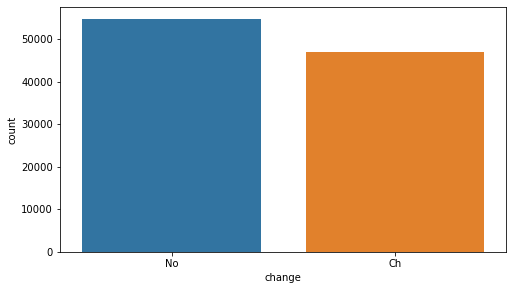

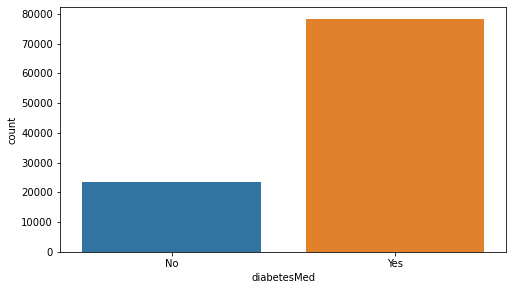

In [219]:
for col in ['max_glu_serum',
            'A1Cresult',
            'change',
            'diabetesMed']:
    plt.figure(figsize=(8,4.5))
    sns.countplot(data=df_diabetes, x=col)
    plt.savefig(f'plots/raw_data/{col}.png', dpi=300, bbox_inches='tight')
    plt.show()

- 23 features for medications

In [220]:
medications = ['metformin',
               'repaglinide',
               'nateglinide',
               'chlorpropamide',
               'glimepiride',
               'acetohexamide',
               'glipizide',
               'glyburide',
               'tolbutamide',
               'pioglitazone',
               'rosiglitazone',
               'acarbose',
               'miglitol',
               'troglitazone',
               'tolazamide',
               'examide',
               'citoglipton',
               'insulin',
               'glyburide-metformin',
               'glipizide-metformin',
               'glimepiride-pioglitazone',
               'metformin-rosiglitazone',
               'metformin-pioglitazone'
              ]

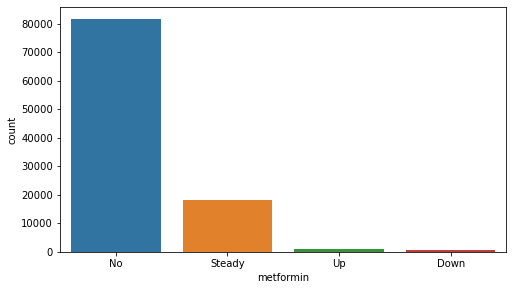

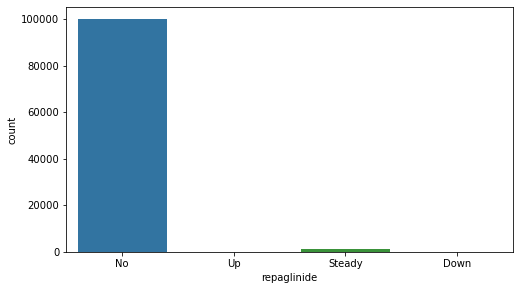

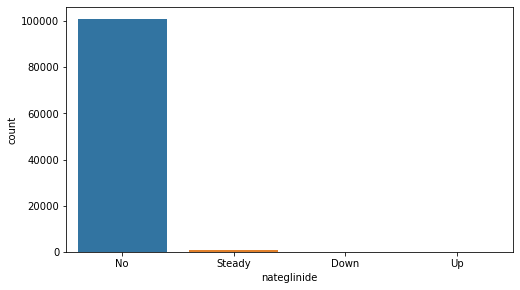

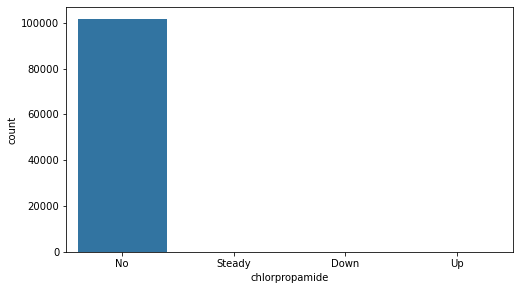

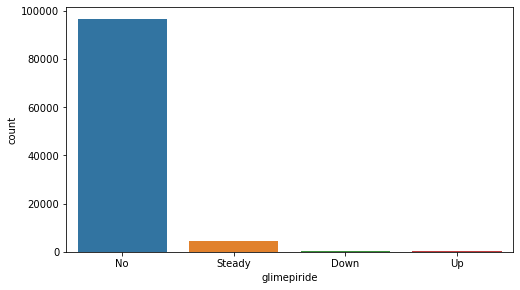

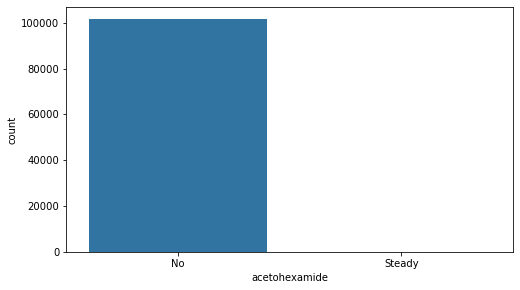

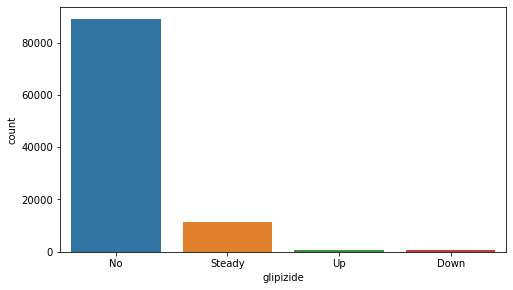

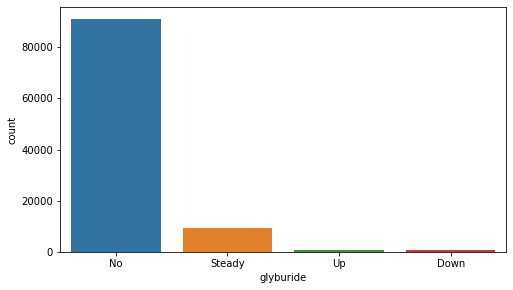

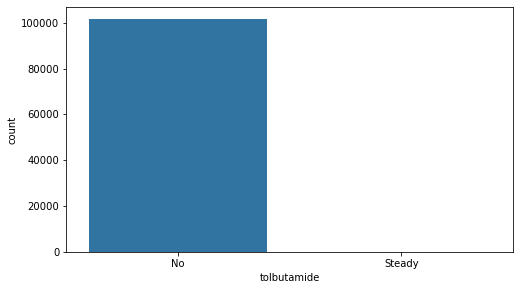

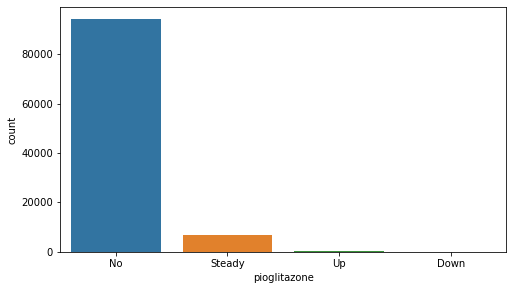

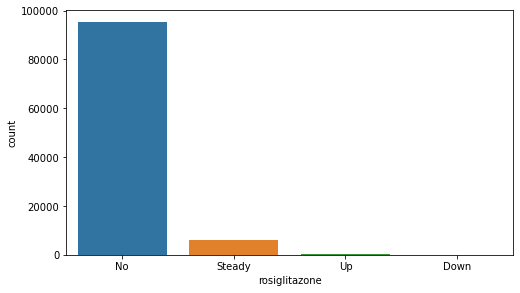

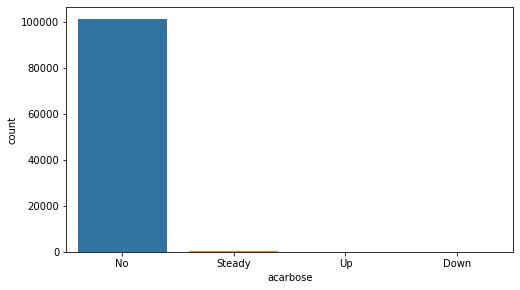

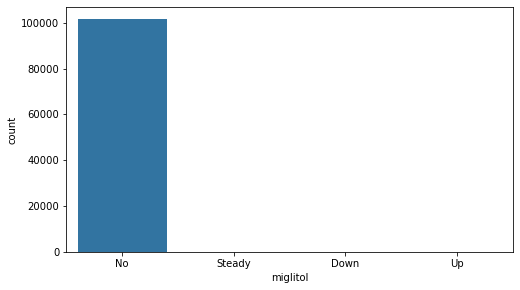

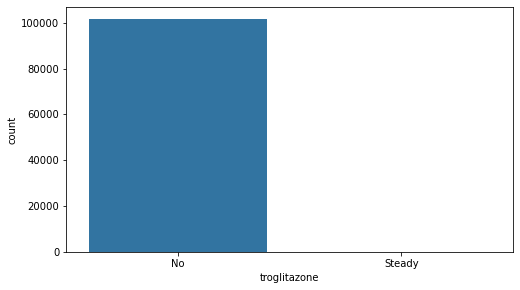

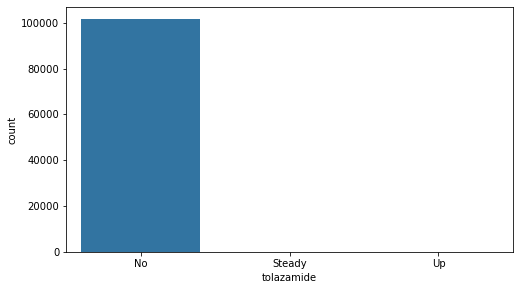

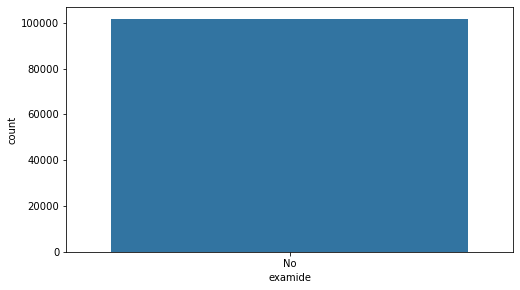

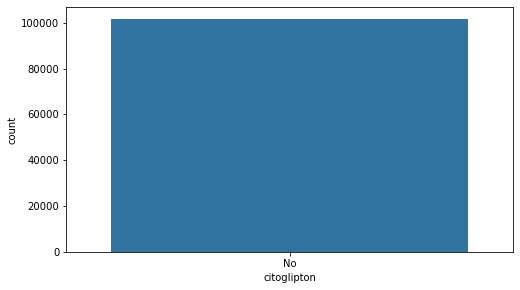

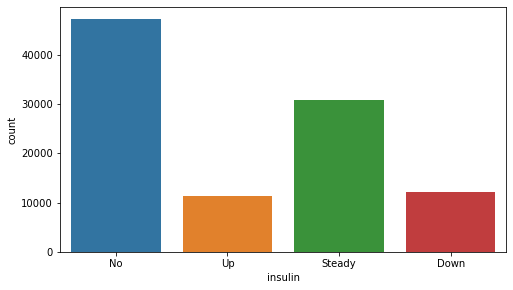

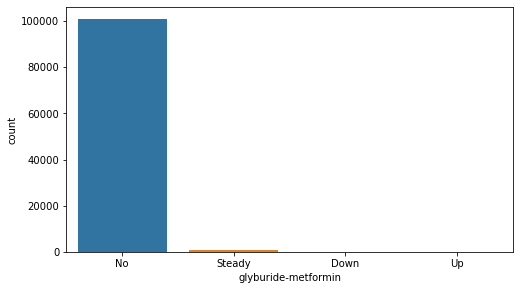

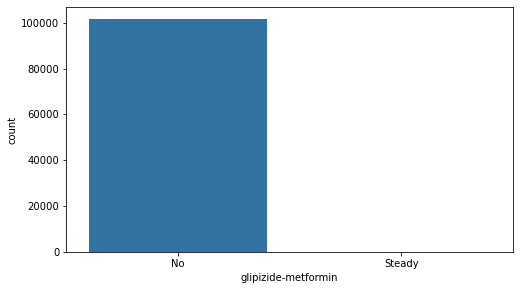

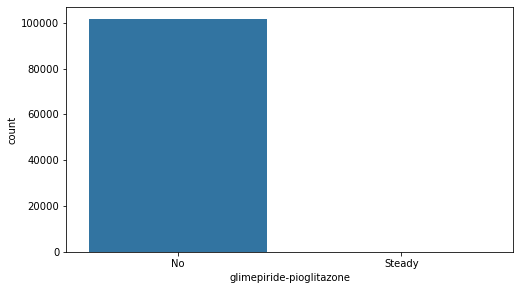

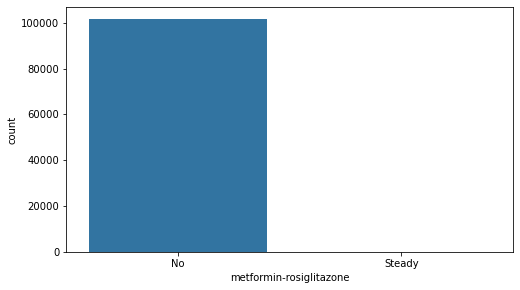

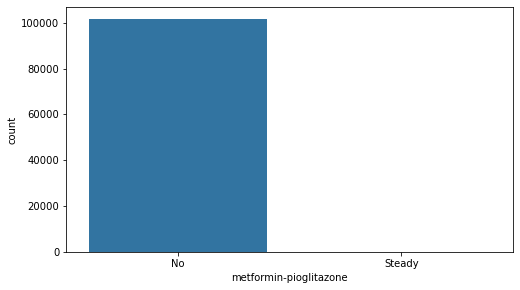

In [221]:
for col in medications:
    plt.figure(figsize=(8,4.5))
    sns.countplot(data=df_diabetes, x=col)
    plt.savefig(f'plots/raw_data/medications/{col}.png', dpi=300, bbox_inches='tight')
    plt.show()

- Encoded categorical features

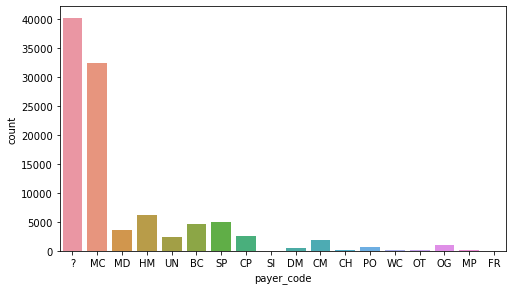

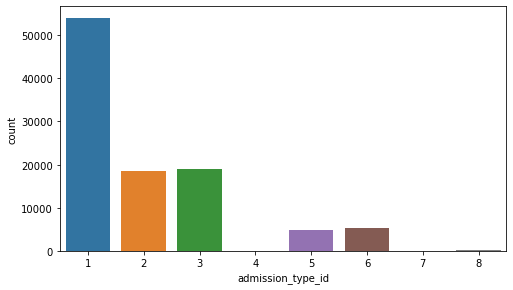

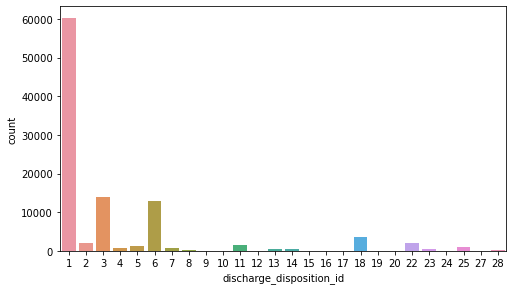

In [222]:
for col in ['payer_code',
            'admission_type_id',
            'discharge_disposition_id']:
    plt.figure(figsize=(8,4.5))
    sns.countplot(data=df_diabetes, x=col)
    plt.savefig(f'plots/raw_data/{col}.png', dpi=300, bbox_inches='tight')
    plt.show()

- Encoded features with too many unique values (not plotted)

In [223]:
df_diabetes['medical_specialty'].nunique()

73

In [224]:
df_diabetes['diag_1'].nunique()

717

In [225]:
df_diabetes['diag_2'].nunique()

749

In [226]:
df_diabetes['diag_3'].nunique()

790

### Quantitative data

- Correlation matrix heatmap on raw data. The darker the color the stronger is the absolute correlation between the numerical columns.

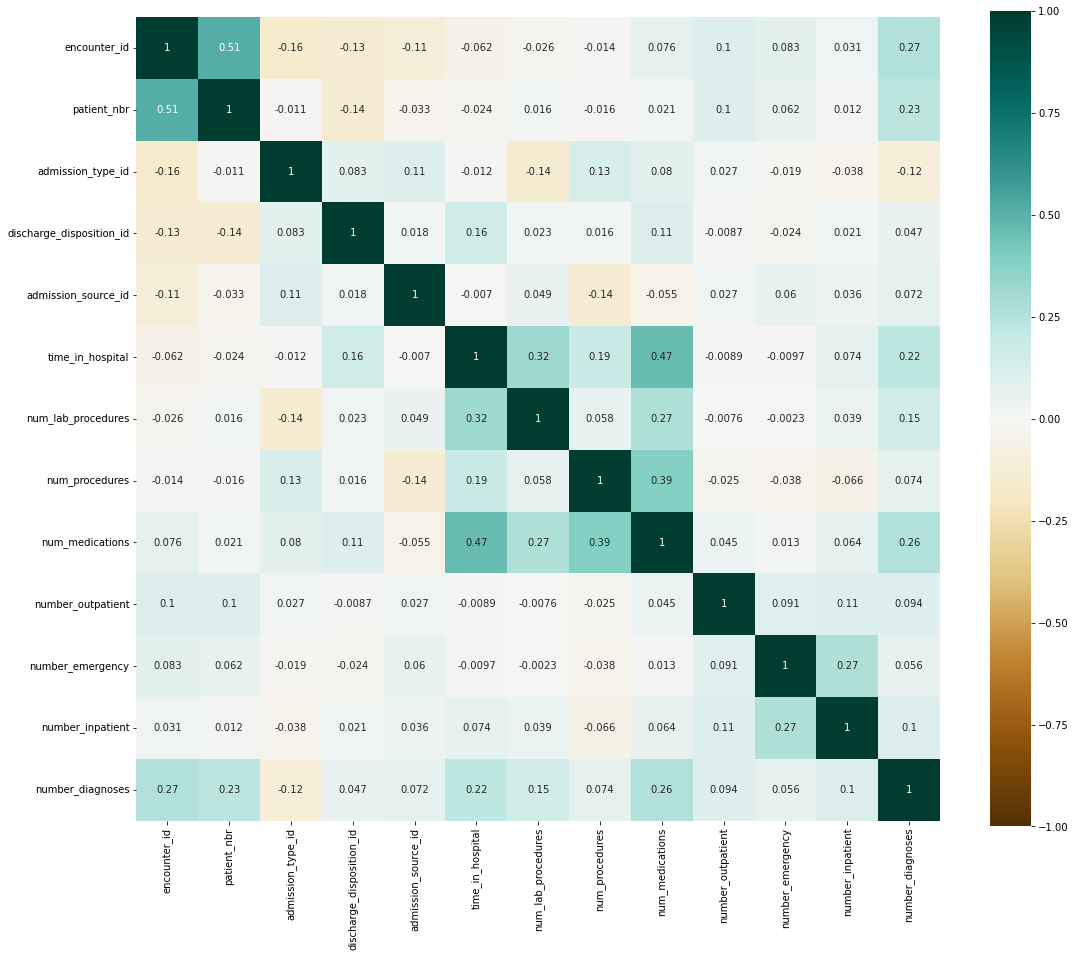

In [216]:
plt.figure(figsize=(18, 15))
sns.heatmap(df_diabetes.corr(), annot=True, vmin=-1, center=0,
            square=True,cmap='BrBG')
plt.savefig('plots/raw_data/corrmatrix_heatmap.png', dpi=300, bbox_inches='tight')
#df_diabetes.corr()["readmitted"].sort_values(ascending=False)

The strongest correlation we observe is between ``encounter_id`` and ``patient_number``, two features which will be removed anyway. In general, the correlations between the numerical features are not alarming. We don't need particular preprocessing steps cocerning feature correlation.

- Define relevant columns with quantitative data.

In [227]:
quantitative = ['time_in_hospital', 
                'num_lab_procedures',
                'num_procedures',
                'num_medications',
                'number_outpatient', 
                'number_emergency',
                'number_inpatient',
                'number_diagnoses']

- Histograms

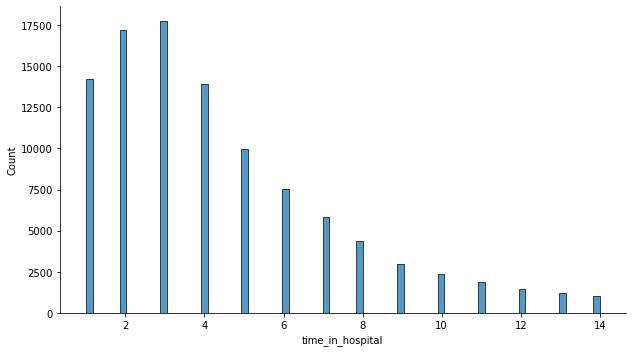

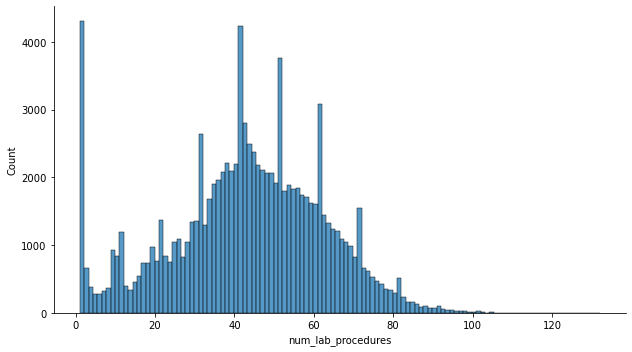

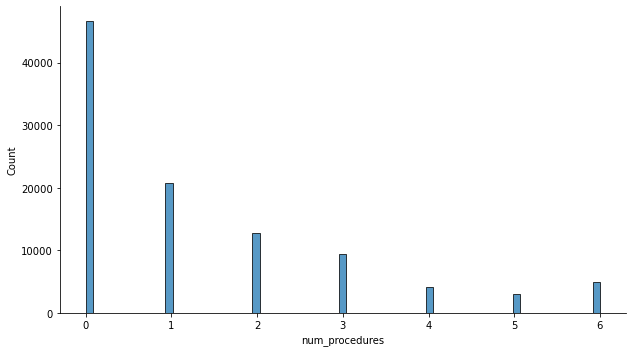

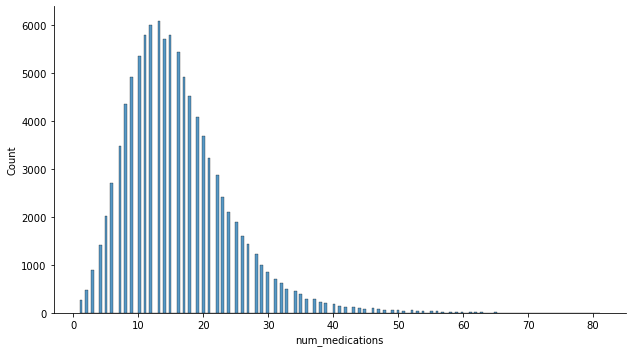

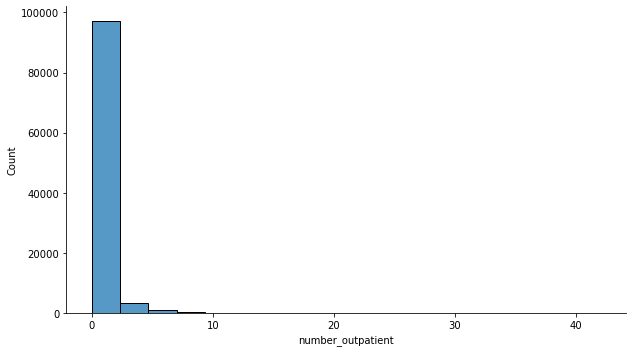

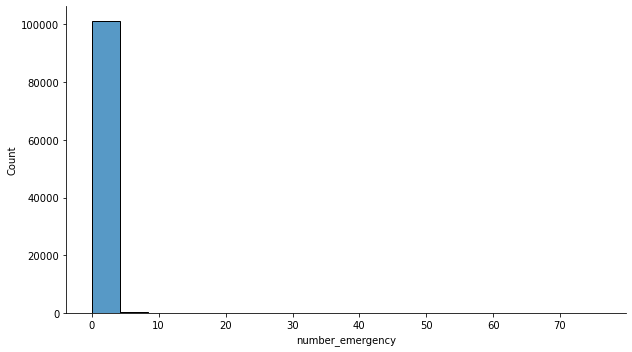

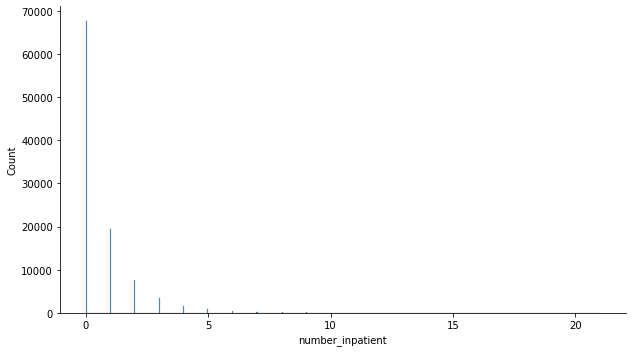

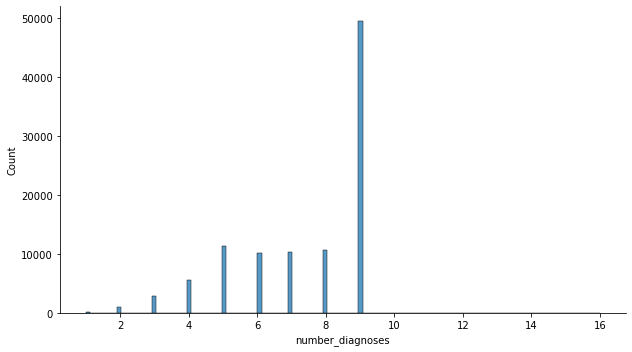

In [229]:
for col in quantitative:
    sns.displot(df_diabetes, x=col, aspect=16/9)
    plt.savefig(f'plots/raw_data/{col}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [230]:
quantitative = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

- Boxplots

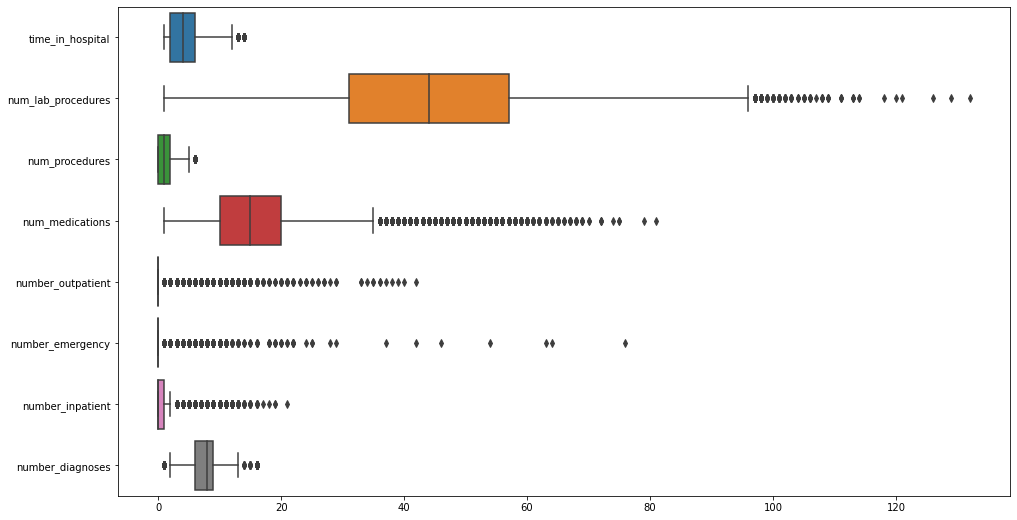

In [231]:
plt.figure(figsize=(16,9))
sns.boxplot(data=df_diabetes[quantitative], orient='h')
plt.savefig('plots//raw_databoxplots_quantitive_features.png', dpi=300, bbox_inches='tight')

In [232]:
df_diabetes['diag_1']

0         250.83
1            276
2            648
3              8
4            197
           ...  
101761    250.13
101762       560
101763        38
101764       996
101765       530
Name: diag_1, Length: 101766, dtype: object

# 2. Data Preprocessing <a id="data-preprocessing"></a>
[Back to top](#top)

## 2.1. Row and column deletion <a id="row-column-deletion"></a>
[Back to top](#top)

- Drop rows which represent readmissions of patients (only keep first encounter for every patient)

In [233]:
df_reduced = df_diabetes.drop_duplicates(subset='patient_nbr', keep='first')

- Drop columns with substantial amount of missing values (> 30%) except for "medical_specialty", as we think it could be an important feature.

In [234]:
to_drop = df_diabetes.loc[:, percentage_missing > 30].columns
to_drop = to_drop.drop('medical_specialty')

df_reduced_2 = df_reduced.drop(to_drop, axis=1)

- Drop columns with only one unique value

In [235]:
df_reduced_3 = df_reduced_2.drop(df_reduced_2.loc[:, df_reduced_2.nunique() == 1].columns, axis=1)

- Drop columns for which every value is different (Encounter ID, Patient Number)

In [236]:
df_reduced_4 = df_reduced_3.drop(df_reduced_3.loc[:, df_reduced_3.nunique() == df_reduced_3.shape[0]].columns, axis=1)

## 2.2. Decoding of ID features <a id="decode-id"></a>
[Back to top](#top)

Map encoded nominal features to their description to get a more comprehensive dataset. The descriptions are provided by the creators of the raw dataset in a CSV-File. It contains the description for ``admission_type_id``, ``discharge_disposition_id``, and ``admission_source_id``.

1. Import the different parts of this CSV-File which contain the description for the respective ID features and save them as dictionaries.
2. Use the dictionaries to replace the numerical labels of the three ID columns by strings which describe their meaning.

In [237]:
dict_admission_type_id = dict(pd.read_csv(raw_data_mappings, skiprows=np.arange(9,68)).values)
dict_admission_type_id

{1: 'Emergency',
 2: 'Urgent',
 3: 'Elective',
 4: 'Newborn',
 5: 'Not Available',
 6: nan,
 7: 'Trauma Center',
 8: 'Not Mapped'}

In [238]:
dict_discharge_disposition_id = dict(pd.read_csv(raw_data_mappings, header=10, skiprows=np.arange(41,68)).values)
dict_discharge_disposition_id

{1: 'Discharged to home',
 2: 'Discharged/transferred to another short term hospital',
 3: 'Discharged/transferred to SNF',
 4: 'Discharged/transferred to ICF',
 5: 'Discharged/transferred to another type of inpatient care institution',
 6: 'Discharged/transferred to home with home health service',
 7: 'Left AMA',
 8: 'Discharged/transferred to home under care of Home IV provider',
 9: 'Admitted as an inpatient to this hospital',
 10: 'Neonate discharged to another hospital for neonatal aftercare',
 11: 'Expired',
 12: 'Still patient or expected to return for outpatient services',
 13: 'Hospice / home',
 14: 'Hospice / medical facility',
 15: 'Discharged/transferred within this institution to Medicare approved swing bed',
 16: 'Discharged/transferred/referred another institution for outpatient services',
 17: 'Discharged/transferred/referred to this institution for outpatient services',
 18: nan,
 19: 'Expired at home. Medicaid only, hospice.',
 20: 'Expired in a medical facility. Medi

In [239]:
dict_admission_source_id = dict(pd.read_csv(raw_data_mappings, header=42).values)
dict_admission_source_id

{1: ' Physician Referral',
 2: 'Clinic Referral',
 3: 'HMO Referral',
 4: 'Transfer from a hospital',
 5: ' Transfer from a Skilled Nursing Facility (SNF)',
 6: ' Transfer from another health care facility',
 7: ' Emergency Room',
 8: ' Court/Law Enforcement',
 9: ' Not Available',
 10: ' Transfer from critial access hospital',
 11: 'Normal Delivery',
 12: ' Premature Delivery',
 13: ' Sick Baby',
 14: ' Extramural Birth',
 15: 'Not Available',
 17: nan,
 18: ' Transfer From Another Home Health Agency',
 19: 'Readmission to Same Home Health Agency',
 20: ' Not Mapped',
 21: 'Unknown/Invalid',
 22: ' Transfer from hospital inpt/same fac reslt in a sep claim',
 23: ' Born inside this hospital',
 24: ' Born outside this hospital',
 25: ' Transfer from Ambulatory Surgery Center',
 26: 'Transfer from Hospice'}

In [240]:
df_mapped = df_reduced_4.copy()

df_mapped = df_mapped.replace({'admission_type_id': dict_admission_type_id,
                               'discharge_disposition_id': dict_discharge_disposition_id, 
                               'admission_source_id': dict_admission_source_id})

In [241]:
df_mapped

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,Pediatrics-Endocrinology,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,?,59,0,...,No,No,Up,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,?,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,?,44,1,...,No,No,Up,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,?,51,0,...,No,No,Steady,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,Caucasian,Female,[70-80),Emergency,Discharged to home,Emergency Room,9,?,50,2,...,No,No,Steady,No,No,No,No,Ch,Yes,>30
101755,Other,Female,[40-50),Emergency,Discharged to home,Emergency Room,14,?,73,6,...,No,No,Up,No,No,No,No,Ch,Yes,>30
101756,Other,Female,[60-70),Emergency,Discharged to home,Emergency Room,2,?,46,6,...,No,No,Steady,No,No,No,No,No,Yes,>30
101758,Caucasian,Female,[80-90),Emergency,Discharged to home,Emergency Room,5,?,76,1,...,No,No,Up,No,No,No,No,Ch,Yes,NO


<span style='color:red'> $\rightarrow$ Remark 1: By looking at the ID descriptions we have detected different types of missing values (nan, 'Not Mapped', 'Not Available', 'Unknown/Invalid') which were not visible before because they were encoded as numerical labels.

<span style='color:red'> $\rightarrow$ Remark 2: There are encounters which result in the patient's death or discharge to a hospice. These patients definetely won't get readmitted. Should we remove them?
    
**Article:** Additionally, we removed all encounters that resulted in either discharge to a hospice or patient death, to avoid biasing our analysis.

In [242]:
# Dead patients will not come back to the hospital :D
print(df_mapped[df_mapped['discharge_disposition_id'] == 'Expired']['readmitted'].unique())

['NO']


## 2.3. Imputation of missing values <a id="imputation"></a>
[Back to top](#top)

- NaN values

In [243]:
# Identify columns with NaN values

na_values = df_mapped.isnull().sum().sort_values(ascending=False)
na_values[na_values > 0]

admission_source_id         4949
admission_type_id           4588
discharge_disposition_id    2474
dtype: int64

In [244]:
# Replace NaN values by column mode

df_imputed = df_mapped.copy()
for col in na_values[na_values > 0].index:
    df_imputed[col] = df_imputed[col].fillna(value=df_mapped[col].mode()[0])

In [245]:
# Result

df_imputed.isnull().sum().sum()

0

- The missing values encoded as '?' are also replaced by the mode apart from the ``medical_specialty`` feature. This feature has so many missing values that we decided to keep them as question mark which can be interpreted as 'medical specialty unknown'. Thus, there will be a ``medical_specialty_?`` column in the final dataset after we one-hot encoded the nominal categorical features.

In [246]:
# Identify columns with '?' values
qm_values = df_imputed.isin(['?']).sum().sort_values(ascending=False)
qm_features = qm_values[qm_values > 0].drop('medical_specialty', axis=1)

medical_specialty    34477
race                  1948
diag_3                1225
diag_2                 294
diag_1                  11
dtype: int64

In [247]:
# Replace question marks by column mode

df_imputed_2 = df_imputed.copy()
for col in qm_features:
    df_imputed_2[col] = df_imputed_2[col].replace(to_replace='?', value=df_imputed[col].mode()[0])

In [248]:
# Result

df_imputed_2.isin(['?']).sum().sum()

34477

- Missing values represented by 'Not Mapped', 'Not Available', and 'Unknown/Invalid'

In [249]:
not_mapped_values = df_imputed_2.isin(['Not Mapped']).sum().sort_values(ascending=False)
not_mapped_values[not_mapped_values > 0]

discharge_disposition_id    778
admission_type_id           291
dtype: int64

In [250]:
not_available_values = df_imputed_2.isin(['Not Available']).sum().sort_values(ascending=False)
not_available_values[not_available_values > 0]

admission_type_id    3174
dtype: int64

In [251]:
unknown_invalid_values = df_imputed_2.isin(['Unknown/Invalid']).sum().sort_values(ascending=False)
unknown_invalid_values[unknown_invalid_values > 0]

gender    3
dtype: int64

In [356]:
df_imputed_3 = df_imputed_2.copy()
for col in not_mapped_values[not_mapped_values > 0].index:
    df_imputed_3[col] = df_imputed_3[col].replace(to_replace='?', value=df_imputed_2[col].mode()[0])
    
for col in not_available_values[not_available_values > 0].index:
    df_imputed_3[col] = df_imputed_3[col].replace(to_replace='?', value=df_imputed_2[col].mode()[0])

## 2.4. Ordinal encoding of age column <a id="ordinal-encoding"></a>
[Back to top](#top)

- The age column contains strings which denote an age interval. This is quantitative information which cannot be interpreted by a learning algorithm.

In [253]:
df_imputed_3['age']

0          [0-10)
1         [10-20)
2         [20-30)
3         [30-40)
4         [40-50)
           ...   
101754    [70-80)
101755    [40-50)
101756    [60-70)
101758    [80-90)
101765    [70-80)
Name: age, Length: 71518, dtype: object

- Replace the strings by integers which reflect the ordinal nature of the given data.

In [254]:
df_encoded = df_imputed_3.copy()
for i in range(0, 10):
    df_encoded['age'] = df_encoded['age'].replace(to_replace=f'[{10 * i}-{10 * i + 10})', value=i)

df_encoded['age']

0         0
1         1
2         2
3         3
4         4
         ..
101754    7
101755    4
101756    6
101758    8
101765    7
Name: age, Length: 71518, dtype: int64

In [255]:
df_encoded['age'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

## 2.5. Complexity reduction by grouping categorical values <a id="grouping"></a>
[Back to top](#top)

- Group the diagnosis codes (ICD-9 codes) to reduce the amount of unique values substantially. To accomplish this, we define a function which automatically replaces all code values in a pandas Series by the category (a string). We apply this function on the respective columns.

In [256]:
# ICD-9 codes grouped with respect to the following articles: 
    # https://simba.isr.umich.edu/restricted/docs/Mortality/icd_09_codes.pdf
    # https://en.wikipedia.org/wiki/List_of_ICD-9_codes
    # https://www.hindawi.com/journals/bmri/2014/781670/

# Define function which replaces the ICD-9 codes in a given Series by the label representing the larger diagnosis group
def categorize_icd9_codes(feature):
    
    # create list to save results 
    list = []
    
    # Categorize icd9 codes
    for index, item in enumerate(feature):      
            
        # E and V codes
        if(any(c.isalpha() for c in item)):
            item = 'external causes of injury and supplemental classification'
        
        # Purely numeric codes
        else:
            # Convert strings into float
            item = float(item)
        
            # Categorize the icd-9 codes
            if(item > 0 and item <= 139):
                item = "infectious and parasitic diseases"
            elif(item >= 140 and item <= 239):
                item = "neoplasms"
            elif(item >= 240 and item <= 279):
                item = "endocrine, nutritional and metabolic diseases, and immunity disorders"
            elif(item >= 280 and item <= 289):
                item = "diseases of the blood and blood-forming organs"
            elif(item >= 290 and item <= 319):
                item = "mental disorders"
            elif(item >= 320 and item <= 389):
                item = "diseases of the nervous system and sense organs"
            elif(item >= 390 and item <= 459):
                item = "diseases of the circulatory system"
            elif(item >= 460 and item <= 519):
                item = "diseases of the respiratory system"
            elif(item >= 520 and item <= 579):
                item = "diseases of the digestive system"
            elif(item >= 580 and item <= 629):
                item = "diseases of the genitourinary system"
            elif(item >= 630 and item <= 679):
                item = "complications of pregnancy, childbirth, and the puerperium"
            elif(item >= 680 and item <= 709):
                item = "diseases of the skin and subcutaneous tissue"
            elif(item >= 710 and item <= 739):
                item = "diseases of the musculoskeletal system and connective tissue"
            elif(item >= 740 and item <= 759):
                item = "congenital anomalies"
            elif(item >= 760 and item <= 779):
                item = "certain conditions originating in the perinatal period"
            elif(item >= 780 and item <= 799):
                item = "symptoms, signs, and ill-defined conditions"
            elif(item >= 800 and item <= 999):
                item = "injury and poisoning"
            else:
                item = "other"
        
        # Save results as Series
        list.append(item)
        new_feature = pd.Series(list)

    return new_feature

In [257]:
# Categorize the icd9 codes in diag_1, diag_2 and diag_3 using the function defined above

df_grouped = df_encoded.copy()
for col in ['diag_1', 'diag_2', 'diag_3']:
    %time df_grouped[col] = categorize_icd9_codes(df_encoded[col])

Wall time: 1min 35s
Wall time: 1min 31s
Wall time: 1min 33s


In [258]:
# Result
df_grouped.select_dtypes('object').nunique().sort_values(ascending=False)

medical_specialty           71
discharge_disposition_id    25
diag_1                      17
diag_2                      17
diag_3                      17
admission_source_id         16
admission_type_id            7
race                         5
glimepiride                  4
glyburide-metformin          4
insulin                      4
miglitol                     4
rosiglitazone                4
pioglitazone                 4
glyburide                    4
glipizide                    4
chlorpropamide               4
nateglinide                  4
repaglinide                  4
metformin                    4
A1Cresult                    4
max_glu_serum                4
readmitted                   3
acarbose                     3
gender                       3
metformin-rosiglitazone      2
diabetesMed                  2
change                       2
metformin-pioglitazone       2
acetohexamide                2
glipizide-metformin          2
troglitazone                 2
tolbutam

We managed to reduce the unique values in the diagnosis columns to a number which is low enough to easily one-hot encode the features later.

## 2.6. Transform target variable <a id="target"></a>
[Back to top](#top)

- Create binary target variable: Readmission within 30 days (and drop old target column)

In [259]:
df = df_grouped.copy()

# add column with new target
df['readmitted_within_30_days'] = df['readmitted'].replace(to_replace=['NO', '>30', '<30'], value=[0, 0, 1])

# drop old column
df = df.drop('readmitted', axis=1)

## 2.7. One-hot Encoding <a id="one-hot-encoding"></a>
[Back to top](#top)

- One-hot encode all nominal categorical features by introducing n-1 dummy variables.

<span style='color:red' >(TO DO: Discuss if ``drop_first = True`` oder ``drop_first = False`` !)

In [260]:
#df_ohe = pd.get_dummies(df)
df_ohe = pd.get_dummies(df, drop_first=True)

In [261]:
df_ohe.shape

(71518, 232)

$\rightarrow$ Result: Fully numericalized dataset:

## 2.8. Split in training and test sets <a id="train-test-split"></a>
[Back to top](#top)

- Split features and target variable and create training and test sets using shuffled and stratified split strategy

In [262]:
X = df_ohe.drop(['readmitted_within_30_days'], axis=1)
y = df_ohe['readmitted_within_30_days']

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [264]:
print(f' X_train: {X_train.shape}, y_train: {y_train.shape} \n X_test: {X_test.shape}, y_test: {y_test.shape}')

 X_train: (53638, 231), y_train: (53638,) 
 X_test: (17880, 231), y_test: (17880,)


## 2.9. Optional Data Balancing <a id="balancing"></a>
[Back to top](#top)

including plots to illustrate the data imbalance and the sampling methods

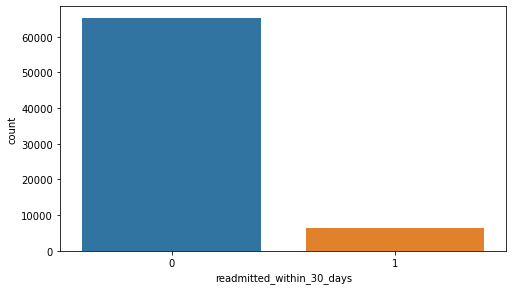

In [265]:
plt.figure(figsize=(8,4.5))
sns.countplot(data=df, x='readmitted_within_30_days')
plt.savefig('plots/preprocessed_data/readmitted_within_30_days.png', dpi=300, bbox_inches='tight')

- **Random Undersampling** on training set: Randomly selected instances of the majority class are deleted until the classes are balanced.

In [266]:
rus = RandomUnderSampler(random_state=42)

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [267]:
X_train_rus.shape, y_train_rus.shape

((9440, 231), (9440,))

C:\Users\fabio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


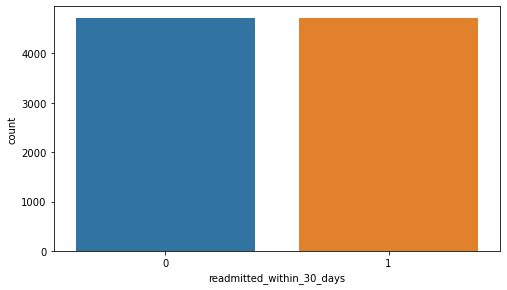

In [268]:
plt.figure(figsize=(8,4.5))
sns.countplot(y_train_rus)
plt.savefig('plots/preprocessed_data/y_train_rus.png', dpi=300, bbox_inches='tight')

- **Random Oversampling** on training set: Randomly selected instances of minority class are duplicated until the classes are balanced.

In [269]:
ros = RandomOverSampler(random_state=42)

X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [270]:
X_train_ros.shape, y_train_ros.shape

((97836, 231), (97836,))

C:\Users\fabio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


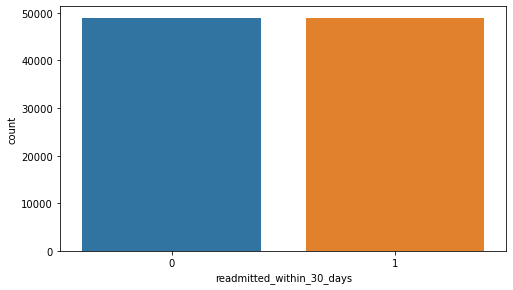

In [271]:
plt.figure(figsize=(8,4.5))
sns.countplot(y_train_ros)
plt.savefig('plots/preprocessed_data/y_train_ros', dpi=300, bbox_inches='tight')

- **Synthetic Minority Oversampling Technique**: New instances of the minority class are synthesized by interpolating existing data points.

In [272]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [273]:
X_train_ros.shape, y_train_ros.shape

((97836, 231), (97836,))

C:\Users\fabio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


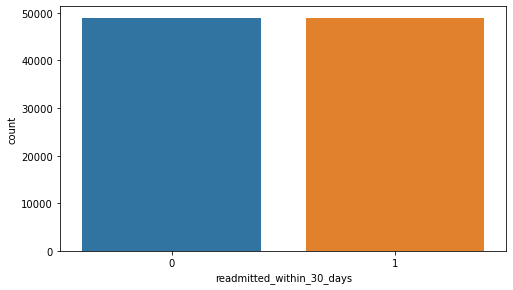

In [274]:
plt.figure(figsize=(8,4.5))
sns.countplot(y_train_smote)
plt.savefig('plots/preprocessed_data/y_train_smote', dpi=300, bbox_inches='tight')

## 2.10. Save Preprocessed Dataframes  <a id="save"></a>
[Back to top](#top)

The preprocessed dataframes are saved in CSV files that will be retrieved for training the models.

This saves us time as we don't need to go through the preprocessing each time while working on the model building.

- Preprocessed data with original data distribution

In [275]:
X_train.to_csv('data/X_train.csv', index=False)
X_test.to_csv('data/X_test.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)

- Randomly undersampled sets

In [276]:
X_train_rus.to_csv('data/X_train_rus.csv', index=False)
y_train_rus.to_csv('data/y_train_rus.csv', index=False)

- Randomly oversampled sets

In [277]:
X_train_ros.to_csv('data/X_train_ros.csv', index=False)
y_train_ros.to_csv('data/y_train_ros.csv', index=False)

- Sets resulting from SMOTE

In [278]:
X_train_smote.to_csv('data/X_train_smote.csv', index=False)
y_train_smote.to_csv('data/y_train_smote.csv', index=False)

# 3. Model Building <a id="model-building"></a>
[Back to top](#top)

In the following chapter, we build several machine learning classification models. To get a feeling which type of algorithm is best suited for our particular problem, we experiment with models which have totally different underlying operating principles. We experiment with linear ([Logistic Regression](#logistic-regression)) and probabilistic ([Naive Bayes](#naive-bayes) models as well as and tree-based ensembles ([Random Forest](#random-forest), [CatBoost](#catboost), [Gradient Boosting](#gradient-boosting)).

## 3.1. Logistic Regression <a id="logistic-regression"></a>
[Back to top](#top)

- Import preprocessed features as DataFrames and target variables as Series

In [279]:
# training and test sets with original data distribution

X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv', squeeze=True)

X_test = pd.read_csv('data/X_test.csv')
y_test = pd.read_csv('data/y_test.csv', squeeze=True)

In [280]:
# resampled / balanced training sets

X_train_rus = pd.read_csv('data/X_train_rus.csv')
y_train_rus = pd.read_csv('data/y_train_rus.csv', squeeze=True)

X_train_ros = pd.read_csv('data/X_train_ros.csv')
y_train_ros = pd.read_csv('data/y_train_ros.csv', squeeze=True)

X_train_smote = pd.read_csv('data/X_train_smote.csv')
y_train_smote = pd.read_csv('data/y_train_smote.csv', squeeze=True)

In [345]:
X_train.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_Asian',
       ...
       'insulin_Steady', 'insulin_Up', 'glyburide-metformin_No',
       'glyburide-metformin_Steady', 'glyburide-metformin_Up',
       'glipizide-metformin_Steady', 'metformin-rosiglitazone_Steady',
       'metformin-pioglitazone_Steady', 'change_No', 'diabetesMed_Yes'],
      dtype='object', length=231)

### 3.1.1 Initial Model Building and Evaluation <a id="logistic-regression-initial"></a>
[Back to top](#top)

#### Model Building

- First logistic regression model: We set the maximal number of iterations to ``max_iter=1000`` which allows the solver to converge. Apart from that we use the default hyperparameter values.

In [281]:
# Create pipeline
clf = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=1000, random_state=42))

# Scale and fit model on training data
%time clf.fit(X_train, y_train)

Wall time: 15.7 s


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [282]:
# Predict labels
y_pred = clf.predict(X_test)

In [283]:
# Calculate accuracy
clf.score(X_test, y_test)

0.9119127516778524

Our first impression is a good accuracy of 91%. However, having the data imbalance in mind, we will evaluate the model in detail.

#### Model Evaluation 

Count of 0 in test set: 16307, (91.2025%)
Count of 1 in test set: 1573, (8.7975%)


C:\Users\fabio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='readmitted_within_30_days', ylabel='count'>

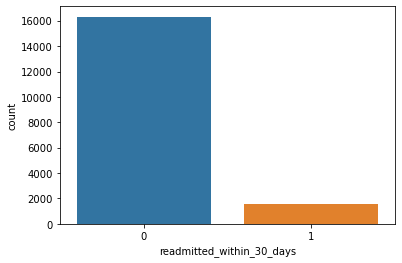

In [284]:
count_0 = (y_test == 0).sum()
count_1 = (y_test == 1).sum()

print(f'Count of 0 in test set: {count_0}, ({round(count_0 / len(y_test) * 100, 4)}%)')
print(f'Count of 1 in test set: {count_1}, ({round(count_1 / len(y_test) * 100, 4)}%)')

sns.countplot(y_test)

The '0' class has a share of 91.2% of all target values in the test data. This means a simple estimator which is always predicting 0 will have an accuracy of 91.2% while evaluated on this data set.

In [285]:
# Classifier which is always predicting the majority class label

simplest_clf = DummyClassifier()
simplest_clf.fit(X_train, y_train)
simplest_clf.score(X_test, y_test)

0.9120246085011185

Consequently, our trained logistic regression model does not have a satisfying accuracy since it is in fact less accurate than the simplest model imaginable!

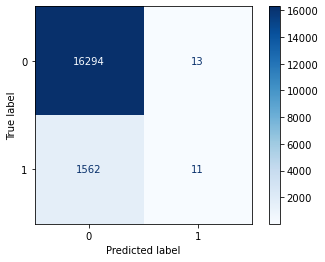

In [286]:
# scikit-learn 1.0 needed

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

In the confusion matrix, the data imbalance becomes obvious. The majority of the instances in the test dataset is classified correctly ($\rightarrow$ therefore the 'good' accuracy), the large majority in the 'True Negative' section. Out of the 17,880 instances, the classifier predicted only 23 instances as '1', and only 11 of these predictions were correct. As we are interested in a model which identifies patients which will be readmitted to the hospital, this model is as worse as it can get. This becomes even clearer if we normalize the counts display in the confusion matrix over the true conditions:

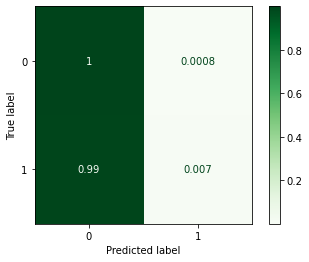

In [287]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Greens', normalize='true')

While only 0.0008% of all '0' instances are misclassified as '1', 99% of all '1' instances are misclassified as '0'!

In [288]:
# Print evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     16307
           1       0.46      0.01      0.01      1573

    accuracy                           0.91     17880
   macro avg       0.69      0.50      0.48     17880
weighted avg       0.87      0.91      0.87     17880



The classification report summarized the already observed difference in performance with respect to the different target classes. We have an overall good accuracy because the classifier performs well in regard to the majority class where it shows perfect recall while also giving a good precision. In regard to the minority class in which we are particularly interested in, the classifier shows an abysmal performance, having the worst possible recall while not even having a good precision.

### 3.1.3. Hyperparameter Tuning<a id="logistic-regression-tuning"></a>
[Back to top](#top)

In [289]:
# Show hyperparameters and their values
clf['logisticregression'].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Hyperparameters to be varied:

- ``penalty``: By default, a l2 regularization is performed. Alternatively, the logistic regression can be done without any regularization or the penalty term can be changed to l1 norm or an elastic net. We opt for an elastic net which includes l1 and l2 regularization (see ``l1_ratio``).

- ``l1_ratio``: The combination of l1 and l2 penalty in the elastic net can be selected by a ratio between 0 and 1. A value of 0 equals l2 regularization while the value of 1 equals l1 regularization.

- ``C``: Inverse of regularization strength. A lower value results in a stronger regularization with 1.0 being the default.

- ``solver``: The algorithm which solves the optimization problem. For the search, we opt for the 'saga' solver, a stochastic average gradient descent implementation which supports elastic net regularization and is recommended for large datasets (https://scikit-learn.org/dev/modules/linear_model.html#logistic-regression).

- ``fit_intercept``: Specification if an intercept should be added to the regression function

- ``max_iter``: Maximum number of iterations as limit for the solver to converge.

- ``tol``: Tolerance of the stopping criteria, by default: 0.0001.

- ``warm_start``: When set to True, the solution of the previous call is used to fit as initialization (False by default.

- ``class_weight``: Weights associated with the different classes in the target variable. By default, all classes are weighted the same. Apart from manually assigning weights to each class, we can use the 'balanced' option which automatically adjust weights inversely proportional to class frequencies. We will deal with class imbalances later.

In the following section, we try to optimize the logistic regression model with regard to its accuracy score. As discussed in the previous section, accuracy might not be the best evaluation metric for our problem. However, an improvement of the accuracy could potentially improve the model: Since the recall for class 0 is already almost 100%, a siginificant increase in accuracy can only be obtained if the classification performance for class 1 improves.


We start by having a detailed look at the hyperparameters of scikit-learn's implementation in order to decide how to vary the model. We conduct a randomized search on a large parameter grid before finetuning with a grid search on a narrowly defined grid.

After having a detailed look at the possible hyperparameter values, we create the following parameter grid which will be given to the randomized search algorithm:

In [290]:
param_dist = {'logisticregression__solver': ['saga'],
              'logisticregression__penalty': ['elasticnet', 'none'],
              'logisticregression__l1_ratio': np.linspace(0, 1, 11), # try different elastic nets
              'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], # vary regularization strength
              'logisticregression__fit_intercept': [False, True], 
              'logisticregression__tol': [0.000001, 0.00001, 0.0001, 0.001, 0.01], # vary stopping threshold
              'logisticregression__warm_start': [False, True],         
             }

We conduct a 3-fold cross validated search where 10 randomly selected parameter combinations are tried:

In [291]:
random_search = RandomizedSearchCV(estimator=clf, 
                                   param_distributions = param_dist,
                                   n_jobs=-1,
                                   cv=3, #reduced to 3-fold to reduce runtime
                                   verbose=1)
%time random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Wall time: 12min 56s


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                             ('logisticregression',
                                              LogisticRegression(max_iter=1000,
                                                                 random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'logisticregression__C': [0.001, 0.01,
                                                                  0.1, 1, 10,
                                                                  100, 1000],
                                        'logisticregression__fit_intercept': [False,
                                                                              True],
                                        'logisticregression__l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'logisticregression__penalty': ['elasticnet',
     

Look a the results of the different tried estimators and identify the best one

In [292]:
rs_cv_results = pd.DataFrame(random_search.cv_results_)
rs_cv_results.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__warm_start,param_logisticregression__tol,param_logisticregression__solver,param_logisticregression__penalty,param_logisticregression__l1_ratio,param_logisticregression__fit_intercept,param_logisticregression__C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,10.793286,0.162985,0.114671,1.543704e-02,True,0.000001,saga,elasticnet,0.9,False,0.01,"{'logisticregression__warm_start': True, 'logi...",0.911969,0.912020,0.912020,0.912003,0.000024,1
9,6.846487,0.276849,0.061794,3.994544e-03,False,0.00001,saga,elasticnet,0.3,True,0.01,"{'logisticregression__warm_start': False, 'log...",0.911969,0.912020,0.912020,0.912003,0.000024,1
3,15.545333,2.720126,0.068001,4.899036e-07,True,0.001,saga,elasticnet,0.6,False,1,"{'logisticregression__warm_start': True, 'logi...",0.911745,0.911796,0.911852,0.911798,0.000044,3
7,4.815364,0.157779,0.063990,1.610144e-05,False,0.01,saga,elasticnet,1.0,True,1,"{'logisticregression__warm_start': False, 'log...",0.911913,0.911852,0.911572,0.911779,0.000148,4
6,8.928012,0.801410,0.066668,3.770345e-03,True,0.01,saga,elasticnet,0.6,True,1000,"{'logisticregression__warm_start': True, 'logi...",0.911633,0.911852,0.911572,0.911686,0.000120,5
2,6.178661,1.070635,0.075999,1.697147e-02,True,0.01,saga,none,1.0,False,0.01,"{'logisticregression__warm_start': True, 'logi...",0.911577,0.911852,0.911572,0.911667,0.000131,6
8,272.170594,90.062339,0.053614,4.841703e-03,False,0.0001,saga,elasticnet,0.8,True,10,"{'logisticregression__warm_start': False, 'log...",0.911689,0.911740,0.911460,0.911630,0.000122,7
1,47.001797,2.491346,0.078671,7.545691e-03,False,0.001,saga,none,0.0,True,1000,"{'logisticregression__warm_start': False, 'log...",0.911521,0.911740,0.911460,0.911574,0.000120,8
5,351.549651,2.426438,0.069332,1.879356e-03,False,0.0001,saga,elasticnet,0.5,False,1000,"{'logisticregression__warm_start': False, 'log...",0.911353,0.911684,0.911460,0.911499,0.000138,9
4,208.660309,0.285025,0.092003,2.141678e-02,False,0.000001,saga,none,1.0,False,1,"{'logisticregression__warm_start': False, 'log...",0.911298,0.911684,0.911460,0.911481,0.000158,10


In [293]:
random_search.best_params_

{'logisticregression__warm_start': True,
 'logisticregression__tol': 1e-06,
 'logisticregression__solver': 'saga',
 'logisticregression__penalty': 'elasticnet',
 'logisticregression__l1_ratio': 0.9,
 'logisticregression__fit_intercept': False,
 'logisticregression__C': 0.01}

In [294]:
clf_opt = random_search.best_estimator_

In [295]:
random_search.best_estimator_.score(X_test, y_test)

0.9120246085011185

#### 'Optimized' Model Evaluation

However, the search did not result in a model with a significantly improved accuracy.

In [296]:
# Predict labels
y_pred = clf_opt.predict(X_test)

# Print metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     16307
           1       0.00      0.00      0.00      1573

    accuracy                           0.91     17880
   macro avg       0.46      0.50      0.48     17880
weighted avg       0.83      0.91      0.87     17880



C:\Users\fabio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fabio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fabio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


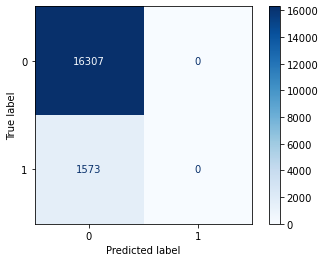

In [297]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

In fact, we found a model which is always predicting 0! No improvement for our purpose.

### 3.1.4. Weighted Logistic Regression to improve ROC-AUC <a id="weighted-logistic-regression"></a>
[Back to top](#top)

In the following section we want to develop a class-weighted logistic regression model to handle the substantial data imbalance better. As accuracy is not a suitable metric (see initial model evaluation), we optimize it in respect to the ROC-AUC metric which describes the area under the receiver operating characteristic (ROC) curve. The ROC curve illustrates the performance of a classifier in terms of true positive rate (recall) and false positive rate as its dicrimination threshold is varied.

#### Starting point

Since the search in the previous section did not result in a better model, we start with our initial logistic regression model again. First, we calculate the ROC-AUC metric and plot the ROC curve of our basic classifier.

In [298]:
# calculate prediction probabilities
y_prob = clf.predict_proba(X_test)

# calculate roc-auc
roc_auc_score(y_test, y_prob[:,1])

0.6518598891088118

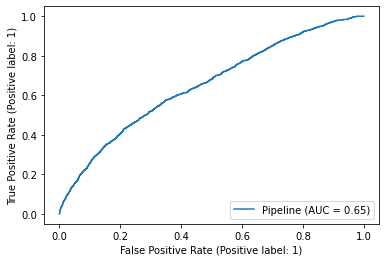

In [299]:
# plot roc curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)

While the ROC curve is far from having a satisfying shape, it is slightly above the bisector. This is reflected in a AUC of 0.65.

#### Weighted Logistic Regression using built-in 'balanced' mode

The scikit-learn implementation provides the 'balanced' mode which uses the following formula to calculate the class weights: ``n_samples / (n_classes * np.bincount(y))``. Hence the following weights are automatically assigned for our training set:

In [300]:
print(f'Class weights in "balanced" mode: {y_train.shape[0] / (y_train.nunique() * np.bincount(y_train))}')

Class weights in "balanced" mode: [0.548244   5.68199153]


This means that the instances of the minority class are weighted around ten times more within the model than the instances of the majority class. This reflects the fact that the majority class has about 10 times more instances than the minority class in the dataset.

In [301]:
# define model
clf_balanced = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))

In [302]:
# fit model
%time clf_balanced.fit(X_train, y_train)

Wall time: 16 s


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [303]:
# calculate probability estimates
y_prob = clf_balanced.predict_proba(X_test)
y_prob_1 = y_prob[:,1]

# calculate roc-auc
roc_auc_score(y_test, y_prob_1)

0.6522913357736105

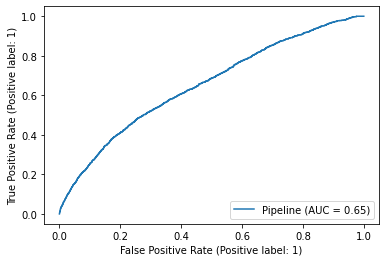

In [304]:
# plot roc curve
RocCurveDisplay.from_estimator(clf_balanced, X_test, y_test)

We observe a small improvement in the ROC-AUC metric using the inverse ratio of the training data (the 'balanced' mode). However, this is a heuristic which does not necessarily yield the best results out of all class weight combinations (https://machinelearningmastery.com/cost-sensitive-logistic-regression/). We conduct a grid search which brute forces different weights in order to either confirm the assumption that the 'balanced' weighting yields the best results or to further improve our ROC-AUC metric.

In [305]:
# create parameter grid with different weight ratios
weight_grid = {'logisticregression__class_weight': [{0: 1, 1: 1}, 
                                                    {0: 1, 1: 10}, 
                                                    {0: 1, 1: 100},
                                                    {0: 1, 1: 1000},
                                                    'balanced']}

In [306]:
# initialize grid search with roc-auc as score
weight_search_roc = GridSearchCV(clf, param_grid=weight_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1)

# fit on training data
%time weight_search_roc.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Wall time: 3min 1s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'logisticregression__class_weight': [{0: 1, 1: 1},
                                                              {0: 1, 1: 10},
                                                              {0: 1, 1: 100},
                                                              {0: 1, 1: 1000},
                                                              'balanced']},
             scoring='roc_auc', verbose=1)

In [307]:
ws_roc_cv_results = pd.DataFrame(weight_search_roc.cv_results_)

ws_roc_cv_results.loc[:, ['param_logisticregression__class_weight', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,param_logisticregression__class_weight,mean_test_score
4,balanced,0.647303
1,"{0: 1, 1: 10}",0.646984
0,"{0: 1, 1: 1}",0.646850
2,"{0: 1, 1: 100}",0.644972
3,"{0: 1, 1: 1000}",0.643860


The best cross-validated ROC-AUC scores are in fact obtained by the balancing heuristic (which we already evaluated above). It is not better to weight the minority class even more (or less).

#### Probability Calibration

Like many other classifiers, a logistic regression is not directly predicting the classes. Instead, the model is predicting the probability for every instance to be in a certain class. Depending on the set discrimination threshold, the actual classification is calculated in the next step. In a well calibrated model, the predicted probabilities reflect the data distribution.

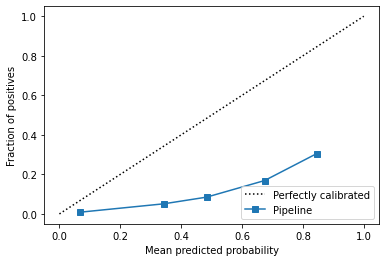

In [308]:
# scikit-learn 1.0 needed
# show calibration curve of current model

CalibrationDisplay.from_estimator(clf_balanced, X_test, y_test)

In general, logistic regression models are by default well calibrated because they are minimizing the log loss. Nevertheless, we fit it again in order to get the best possible calibration. 

In [309]:
# fit and calibrate model on training data

clf_calibrated = CalibratedClassifierCV(clf_balanced, n_jobs=-1)
%time clf_calibrated.fit(X_train, y_train)

Wall time: 56.9 s


CalibratedClassifierCV(base_estimator=Pipeline(steps=[('minmaxscaler',
                                                       MinMaxScaler()),
                                                      ('logisticregression',
                                                       LogisticRegression(class_weight='balanced',
                                                                          max_iter=1000,
                                                                          random_state=42))]),
                       n_jobs=-1)

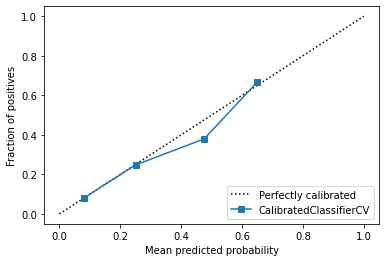

In [310]:
# scikit-learn 1.0 needed
# show calibration curve of calibrated model

CalibrationDisplay.from_estimator(clf_calibrated, X_test, y_test)

#### G-Mean Optimizing Threshold Selection

The ROC-AUC metric provides a measure of performance across all possible discrimination thresholds. To have the best possible model we have to choose the threshold which suits the purpose of the model. A common way to choose the threshold is to maximize the geometric mean between the two dimensions of the ROC curve, true positive rate and false positive rate.

In [311]:
# predict probabilities
y_prob = clf_calibrated.predict_proba(X_test)

# probabilities for the positive outcome only
y_prob_1 = y_prob[:, 1]

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_1)

# calculate g-mean for every threshold
gmeans = np.sqrt(tpr * (1-fpr))

In [312]:
# Save in dataframe and sort by gmean

df_thresh_gmean = pd.DataFrame({'Threshold': thresholds, 'FPR': fpr, 'TPR': tpr, 'GMean': gmeans})
df_thresh_gmean.sort_values(by='GMean', ascending=False)

,Threshold,FPR,TPR,GMean
1539,0.086227,0.363218,0.581055,0.608281
1541,0.086070,0.365426,0.581691,0.607557
1529,0.086501,0.359845,0.576605,0.607550
1531,0.086460,0.360581,0.577241,0.607535
1537,0.086256,0.362912,0.579148,0.607428
...,...,...,...,...
4,0.630740,0.000123,0.001271,0.035655
1,0.746083,0.000000,0.000636,0.025214
2,0.677901,0.000061,0.000636,0.025213
0,1.746083,0.000000,0.000000,0.000000


In [313]:
# get the best threshold
best_thresh_gmean = thresholds[np.argmax(gmeans)]
best_thresh_gmean

0.08622663176810119

#### Weighted Model Evaluation

In [314]:
# calculate probability estimates for class 1
y_prob = clf_calibrated.predict_proba(X_test)
y_prob_1 = y_prob[:,1]

#calculate predictions using custom discrimination threshold
y_pred = (y_prob_1 >= best_thresh_gmean).astype(int)

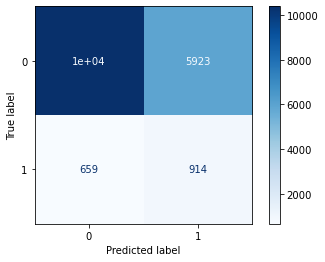

In [315]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

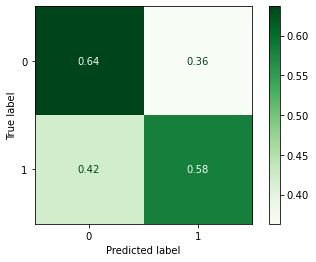

In [316]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', cmap='Greens')

In [317]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.64      0.76     16307
           1       0.13      0.58      0.22      1573

    accuracy                           0.63     17880
   macro avg       0.54      0.61      0.49     17880
weighted avg       0.87      0.63      0.71     17880



From a minority class perspective we improved our model significantly. While the basic logistic regression misclassified almost every minority class instance, the weighted model is classifying 59% correctly (=recall). This happened at the expense of overall accuracy since many majority class instances are now misclassified as well. The trade-off of recall and precision becomes visible: While the recall is substantially improved, precision decreased substantially to 13%. In other words: Out of 8 times the classifier predicts the minority class, only one classification is correct.

### 3.1.5. Precision-Recall Curve <a id="logistic-regression-pr"></a>
[Back to top](#top)

In the previous section we improved our model in respect to the ROC-AUC metric and were able to get a more satisfying model regarding the purpose to identify patients which will get readmitted to the hospital within 30 days. Having that goal in mind, we can state that we are more/particularly interested in the performance regarding the minority class '1' and less interested in the performance regarding the majority class '0'. Therefore, it is worth to also look at the precision-recall curve which only takes the class 1 into account and to select the threshold according to precision and recall.

#### Starting point

Let's have a look at the PR curve and average precision score of our built weighted logistic regression model.

In [318]:
y_prob_1 = clf_calibrated.predict_proba(X_test)[:,1]
average_precision_score(y_test, y_prob_1)

0.16785824403157074

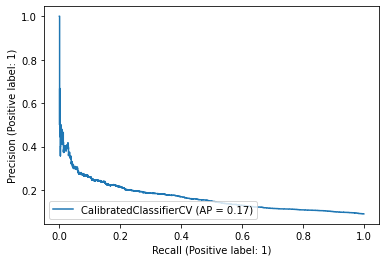

In [319]:
PrecisionRecallDisplay.from_estimator(clf_calibrated, X_test, y_test)

We observe a PR curve which are far from an ideal shap. Our model shows a average precision (=area under curve) of about 0.17.

#### F-Score Optimizing Threshold Selection

We can select our preferred discrimiination threshold according to a weighted measure of the two dimensions precision and recall. The most common F-score is the F1 which is the harmonic mean between precision and recall and threfore for use cases where the both scores are equally important. We additionally calculate the F2-score for which the recall is twice as important as the precision.

In [358]:
# predict probabilities
y_prob = clf_calibrated.predict_proba(X_test)

# probabilities for the positive outcome only
y_prob_1 = y_prob[:, 1]

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_1)

# calculate f scores for every threshold
f1_scores = (2 * precision * recall) / (precision + recall)
f2_scores = (5 * precision * recall) / (4 * precision + recall)

In [359]:
# Save in dataframe and sort by f1-score
df_thresh_f = pd.DataFrame({'Threshold': thresholds, 'Precision': precision[:-1], 'Recall': recall[:-1], 'F1-Score': f1_scores[:-1], 'F2-Score': f2_scores[:-1]})
df_thresh_f.sort_values(by='F1-Score', ascending=False)

,Threshold,Precision,Recall,F1-Score,F2-Score
14141,0.113164,0.176121,0.376987,0.240081,0.306968
14124,0.112934,0.175827,0.378258,0.240065,0.307462
14140,0.113161,0.176069,0.376987,0.240032,0.306936
14123,0.112904,0.175775,0.378258,0.240016,0.307430
14139,0.113158,0.176017,0.376987,0.239984,0.306904
...,...,...,...,...,...
17503,0.604209,0.600000,0.001907,0.003802,0.002382
17505,0.638408,0.666667,0.001271,0.002538,0.001589
17504,0.630740,0.500000,0.001271,0.002536,0.001588
17507,0.746083,1.000000,0.000636,0.001271,0.000795


In [360]:
# get the f1-optimizing threshold
best_thresh_f1 = thresholds[np.argmax(f1_scores)]
best_thresh_f1

0.1131638020687172

In [361]:
# sort by f2 score
df_thresh_f.sort_values(by='F2-Score', ascending=False)

,Threshold,Precision,Recall,F1-Score,F2-Score
4951,0.063284,0.106076,0.846790,0.188535,0.353334
4965,0.063317,0.106115,0.846154,0.188580,0.353332
4950,0.063273,0.106068,0.846790,0.188522,0.353316
4964,0.063315,0.106107,0.846154,0.188567,0.353313
4949,0.063272,0.106059,0.846790,0.188508,0.353297
...,...,...,...,...,...
17503,0.604209,0.600000,0.001907,0.003802,0.002382
17505,0.638408,0.666667,0.001271,0.002538,0.001589
17504,0.630740,0.500000,0.001271,0.002536,0.001588
17507,0.746083,1.000000,0.000636,0.001271,0.000795


In [324]:
# get the f2-optimizing threshold
best_thresh_f2 = thresholds[np.argmax(f2_scores)]
best_thresh_f2

0.06328352255839384

#### Model Evaluation

##### a) F1-optimizing threshold

In [362]:
# calculate probability estimates for class 1
y_prob = clf_calibrated.predict_proba(X_test)
y_prob_1 = y_prob[:,1]

#calculate predictions using custom discrimination threshold
y_pred = (y_prob_1 >= best_thresh_f1).astype(int)

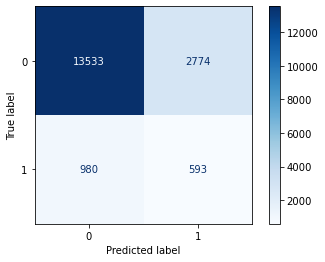

In [326]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

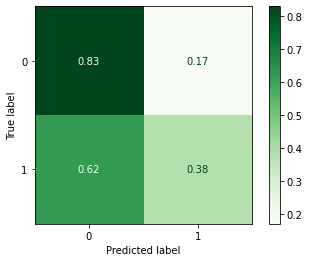

In [327]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', cmap='Greens')


In [363]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88     16307
           1       0.18      0.38      0.24      1573

    accuracy                           0.79     17880
   macro avg       0.55      0.60      0.56     17880
weighted avg       0.87      0.79      0.82     17880



Classification with the F1-optimizing threshold keeps a certain accuracy (77%). However, only 40% of all minority class instances are predicted as 1 which is not satisfying for our model purpose.

##### b) F2-optimizing threshold

In [329]:
# calculate probability estimates for class 1
y_prob = clf_calibrated.predict_proba(X_test)
y_prob_1 = y_prob[:,1]

#calculate predictions using custom discrimination threshold
y_pred = (y_prob_1 >= best_thresh_f2).astype(int)

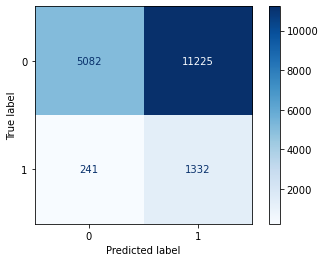

In [330]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

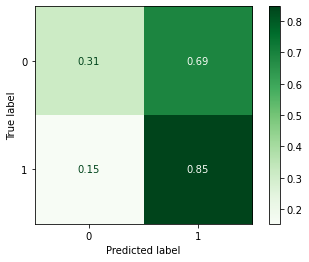

In [331]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', cmap='Greens')

In [332]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.31      0.47     16307
           1       0.11      0.85      0.19      1573

    accuracy                           0.36     17880
   macro avg       0.53      0.58      0.33     17880
weighted avg       0.88      0.36      0.45     17880



The classification with the very low F2-optimizing threshold shows a high recall while precision has not decreased much compared to the one we found before (but is very low!). 77% of all patients which wil be readmitted within 30 days are recognized beforehand.

### 3.1.6. Logistic Regression on Resampled Data <a id="logistic-regression-sampling"></a>
[Back to top](#top)

A different approach is the application of a unweighted logistic regression model on data which was balanced before using sampling techniques.
We will test this approach by applying our already built basic model on three differently generated datasets.  

#### Model Fitting and Evaluation

1. Randomly undersampled training data

In [333]:
clf_rus = clf
clf.fit(X_train_rus, y_train_rus)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [334]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.64      0.76     16307
           1       0.13      0.56      0.21      1573

    accuracy                           0.63     17880
   macro avg       0.53      0.60      0.49     17880
weighted avg       0.87      0.63      0.71     17880



2. Randomly oversampled training data

In [335]:
clf_ros = clf
clf.fit(X_train_ros, y_train_ros)

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78     16307
           1       0.14      0.55      0.22      1573

    accuracy                           0.66     17880
   macro avg       0.54      0.61      0.50     17880
weighted avg       0.87      0.66      0.73     17880



3. Oversampled training data resulting from SMOTE

In [336]:
clf_smote = clf

clf.fit(X_train_smote, y_train_smote)

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     16307
           1       0.14      0.04      0.06      1573

    accuracy                           0.89     17880
   macro avg       0.53      0.51      0.50     17880
weighted avg       0.85      0.89      0.87     17880



#### Conclusion

While the basic model shows terrible results when fitted on the SMOTE-generated dataset, the evaluation metrics of the models fitted on randomly over-/undersmapled datasets are comparable with the results we got in the previous analyses. 

### 3.1.7. Feature Importance <a id="logistic-regression-importance"></a>
[Back to top](#top)

#### a) Coefficients

When the input data was scaled, the coefficients of a linear regression model can be seen as a crude feature importance metric. (https://machinelearningmastery.com/calculate-feature-importance-with-python/)

In [337]:
# Retrieve coefficients from the logistic regression model
coef = clf_balanced['logisticregression'].coef_[0]

# Save as dataframe and sort by coefficient value
df_coef = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coef})
df_coef.sort_values(by='Coefficient', ascending=False).head()

,Feature,Coefficient
7,number_inpatient,4.067123
6,number_emergency,3.300709
34,discharge_disposition_id_Discharged/transferre...,1.796510
32,discharge_disposition_id_Discharged/transferre...,1.721434
27,discharge_disposition_id_Discharged/transferre...,1.443782


We observe that the number of hospital admissions (inpatient and emergency) in the year preceding the encounter is the most important influence factor for readmission from the perspective of the built logistic regression model. This implies that patients with a recent history of hospital encounters are at risk to go to the hospital again within a short amount of times.

#### b) Permutation Importance

In [338]:
result_perm_imp = permutation_importance(clf_calibrated, X_test, y_test, random_state=42, n_repeats=10, n_jobs=-1)

In [339]:
df_perm_imp = pd.DataFrame({'Feature': X_test.columns, 
                            'Mean Importance': result_perm_imp['importances_mean']
                           })

In [340]:
df_perm_imp.sort_values(by='Mean Importance', ascending=False)

,Feature,Mean Importance
7,number_inpatient,0.000123
27,discharge_disposition_id_Discharged/transferre...,0.000112
40,discharge_disposition_id_Hospice / medical fac...,0.000056
210,rosiglitazone_No,0.000039
32,discharge_disposition_id_Discharged/transferre...,0.000028
...,...,...
172,diag_3_external causes of injury and supplemen...,-0.000084
8,number_diagnoses,-0.000095
139,"diag_1_endocrine, nutritional and metabolic di...",-0.000106
23,discharge_disposition_id_Discharged/transferre...,-0.000129


The permutation feature importance confirms the implication from the coefficients. ``number_inpatients`` is the most important feature for our model's prediction.

### 3.1.8. Conclusion <a id="logistic-regression-conclusion"></a>
[Back to top](#top)

The efforts made to optimize the logistic regression model clearly show the fact that building the perfect model is not possible, especially when dealing with highly imbalanced data. In our case, we observe extreme trade-offs between precision and recall while predicting the minority class. Our model has the purpose of identifying patients which have a high chance of being readmitted within a short amount of time to the hospital. Deploying this model in a hospital could help to prevent these readmissions by taking measures for these dangered patients. This model is only good if it has a high recall - which means that it does not overlook lots of patients at risk. Our analysis shows that aiming for a medium-high recall of >60% already decrases the precision to 13%. A model with a precision that low is not really suitable for daily use in a hospital because the large majority of the special measures would be taken for patients which were not at risk.


## 3.2. Naive Bayes <a id="naive-bayes"></a>
[Back to top](#top)

In [341]:
# ...

## 3.3. Random Forest <a id="random-forest"></a>
[Back to top](#top)

In [342]:
# ...

## 3.4. CatBoost<a id="catboost"></a>
[Back to top](#top)

### 3.4.1 Initial Model<a id="catboost-initial"></a>
[Back to top](#top)

### 3.4.2 Handling Imbalance: Resampled Training Data <a id="catboost-sampling"></a>
[Back to top](#top)

### 3.4.3 Hyperparameter Tuning <a id="catboost-tuning"></a>
[Back to top](#top)

### 3.4.4 ROC Curve <a id="catboost-roc"></a>
[Back to top](#top)

### 3.4.5 Precision-Recall Curve <a id="catboost-pr"></a>
[Back to top](#top)

### 3.4.6 Feature Importance <a id="catboost-importance"></a>
[Back to top](#top)

### 3.4.7 Conclusion <a id="catboost-conclusion"></a>
[Back to top](#top)

## 3.5. Gradient Boosting <a id="gradient-boosting"></a>
[Back to top](#top)

In [344]:
# ...

# 4 Final Model Evaluation and Conclusion <a id="model-evaluation"></a>
[Back to top](#top)

#### Final Evaluation Table

- Accuracy of basic model
- Accuracy of tuned model


- Precision
- Recall


- ROC-AUC
- Optimized G-Mean


- Average Precision (PR-AUC)
- Optimized F1